# Evaluation Project - 3
HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.
 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

### Importing Required Libraries For EDA, Data Wrangling, Data Cleaning

In [2]:
import pandas as pd   #for data wrangling
import numpy as np    #basic computation
import seaborn as sns   #for visualization
import matplotlib.pyplot as plt #for plotting
%matplotlib inline
import warnings    #filter warning
warnings.filterwarnings('ignore')

Importing the HR datasheet

In [3]:
df=pd.read_csv('IBM_HR.csv')

In [149]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [12]:
print('Number of column :',df.shape[0])
print('Number of column :',df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

Number of column : 1470
Number of column : 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [22]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

Comment :

In this HR dataset we have 1470 rows and 35 columns.

Non-null count is same for all Columns, so it seem that it contain No missing value. Still we need to perform Data integrity Check for null values in form of "-","NA" , any duplicate entry or error in Data.

Out of 35 we have 9 features with Object datatypes and rest are int64 types

Among all Numeric Variables 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' are ordinal variable. Unique range of all these ordinal Variable need to check.

We have Target Variable 'Attrition'.

In [23]:
df.duplicated().sum()

0

## Checking Missing Values 

In [27]:
missing_values=df.isnull().sum().sort_values(ascending=False)
percent_missing_values=(missing_values)/(len(df))*100
print(percent_missing_values)

Age                         0.0
StandardHours               0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StockOptionLevel            0.0
MonthlyIncome               0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
MonthlyRate                 0.0
MaritalStatus               0.0
Attrition                   0.0
EmployeeCount               0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeNumber              0.0
JobSatisfaction             0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvol

As we can see there is no missing data

<AxesSubplot:>

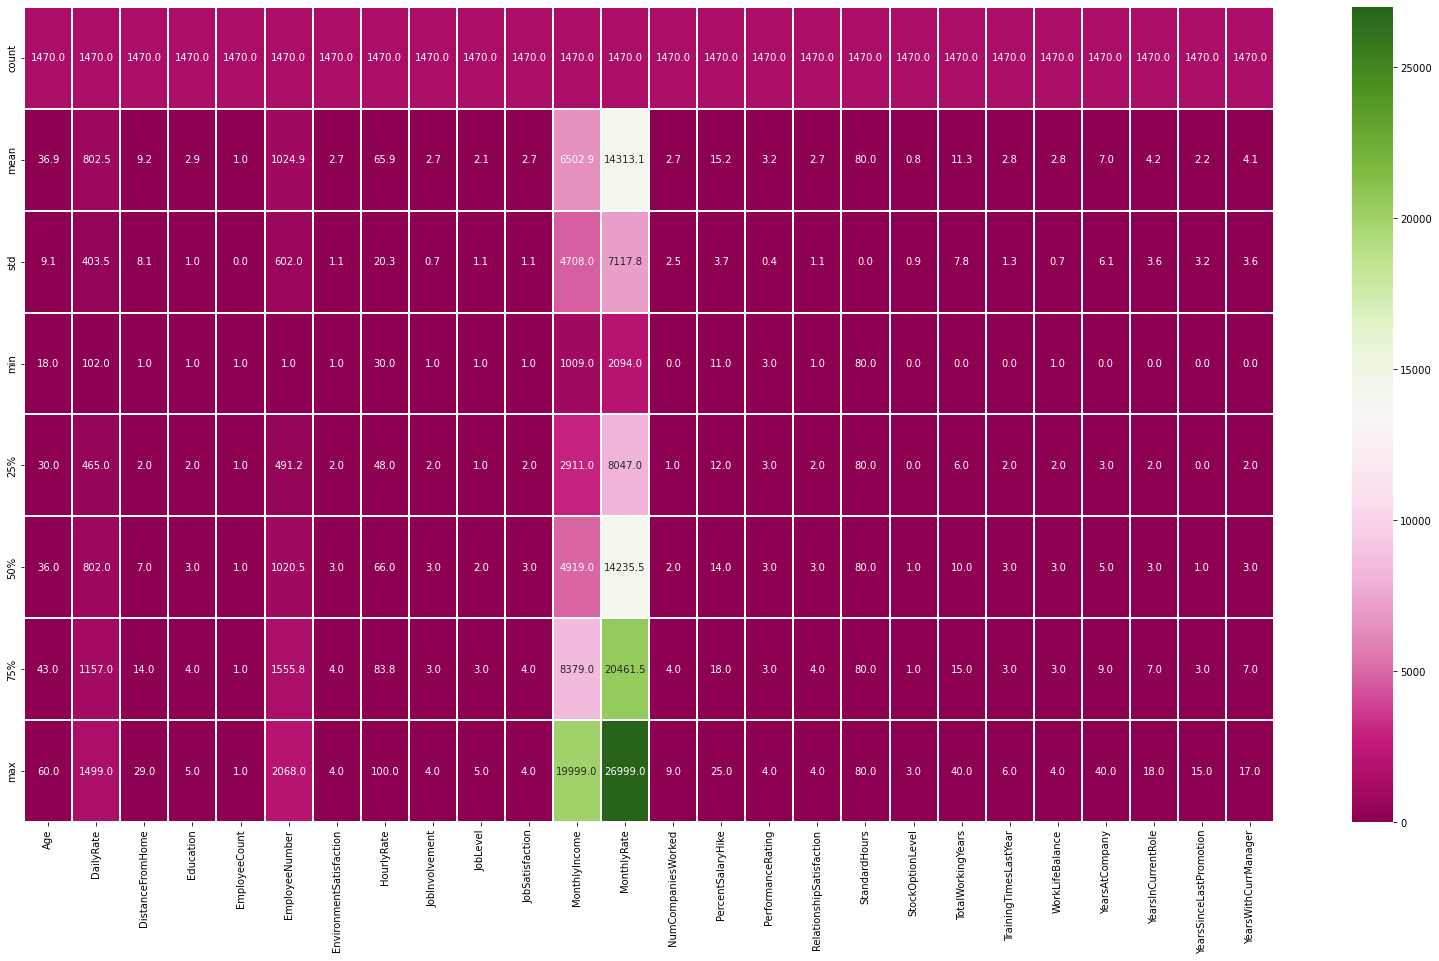

In [34]:
plt.figure(figsize=(28,15))
sns.heatmap(df.describe(),fmt='0.1f',linewidths=0.2,annot=True,cmap='PiYG')

In [35]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.924,9.135,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.486,403.509,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.193,8.107,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.913,1.024,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000,0.000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865,602.024,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.722,1.093,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891,20.329,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.730,0.712,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.064,1.107,1.0,1.00,2.0,3.00,5.0


Comment :

Minimum Empolyee Age is 18 and Maximum age of employee 60.

Average distance from home is 9.1 KM. It means that most of employee travel atleast 18 KM in day from home to office.

On Average performance Rating of employees is 3.163 with min value 3.0. This Means that performance of most of employee is 'Good'.This implies that Attrition of Employee with 'Outstanding' or 5 rating need to investigate.

50% of Employees has worked atleast 2 companies previously.

For Monthly Income,Monthly Rate by looking at 50% and max column we can say outliers exist in this feature.
By looking at Mean and Median we see that some of the features are skew in nature.

For ordinal features statstical terminology of mean, median, std deviation doesnot make sense.

StandardHours and EmployeeCount contain same value for all stastical parameter. It means they contain one unique value.

### Lets check the variable one by one

In [38]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [39]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [41]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [42]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [44]:
df['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25])

we can see salary hike is from 11 to 25%

### Some Satistical Analysis

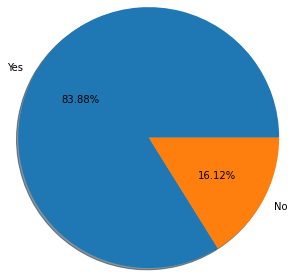

In [54]:
labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =1.5,autopct = '%2.2f%%', shadow=True,)
plt.show()

Comment:

83.88% (1237 employees) Employees did not leave the organization while 16.12% (237 employees) leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

### Value Count and sub categories for different catgorical Data 

In [57]:
category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in category:
    print(i)
    print(df[i].value_counts())
    print('\n')

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Gender
Male      882
Female    588
Name: Gender, dtype: int64


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


MaritalStatus
Married     673
Single      470
Divorced    327
Name: Marital

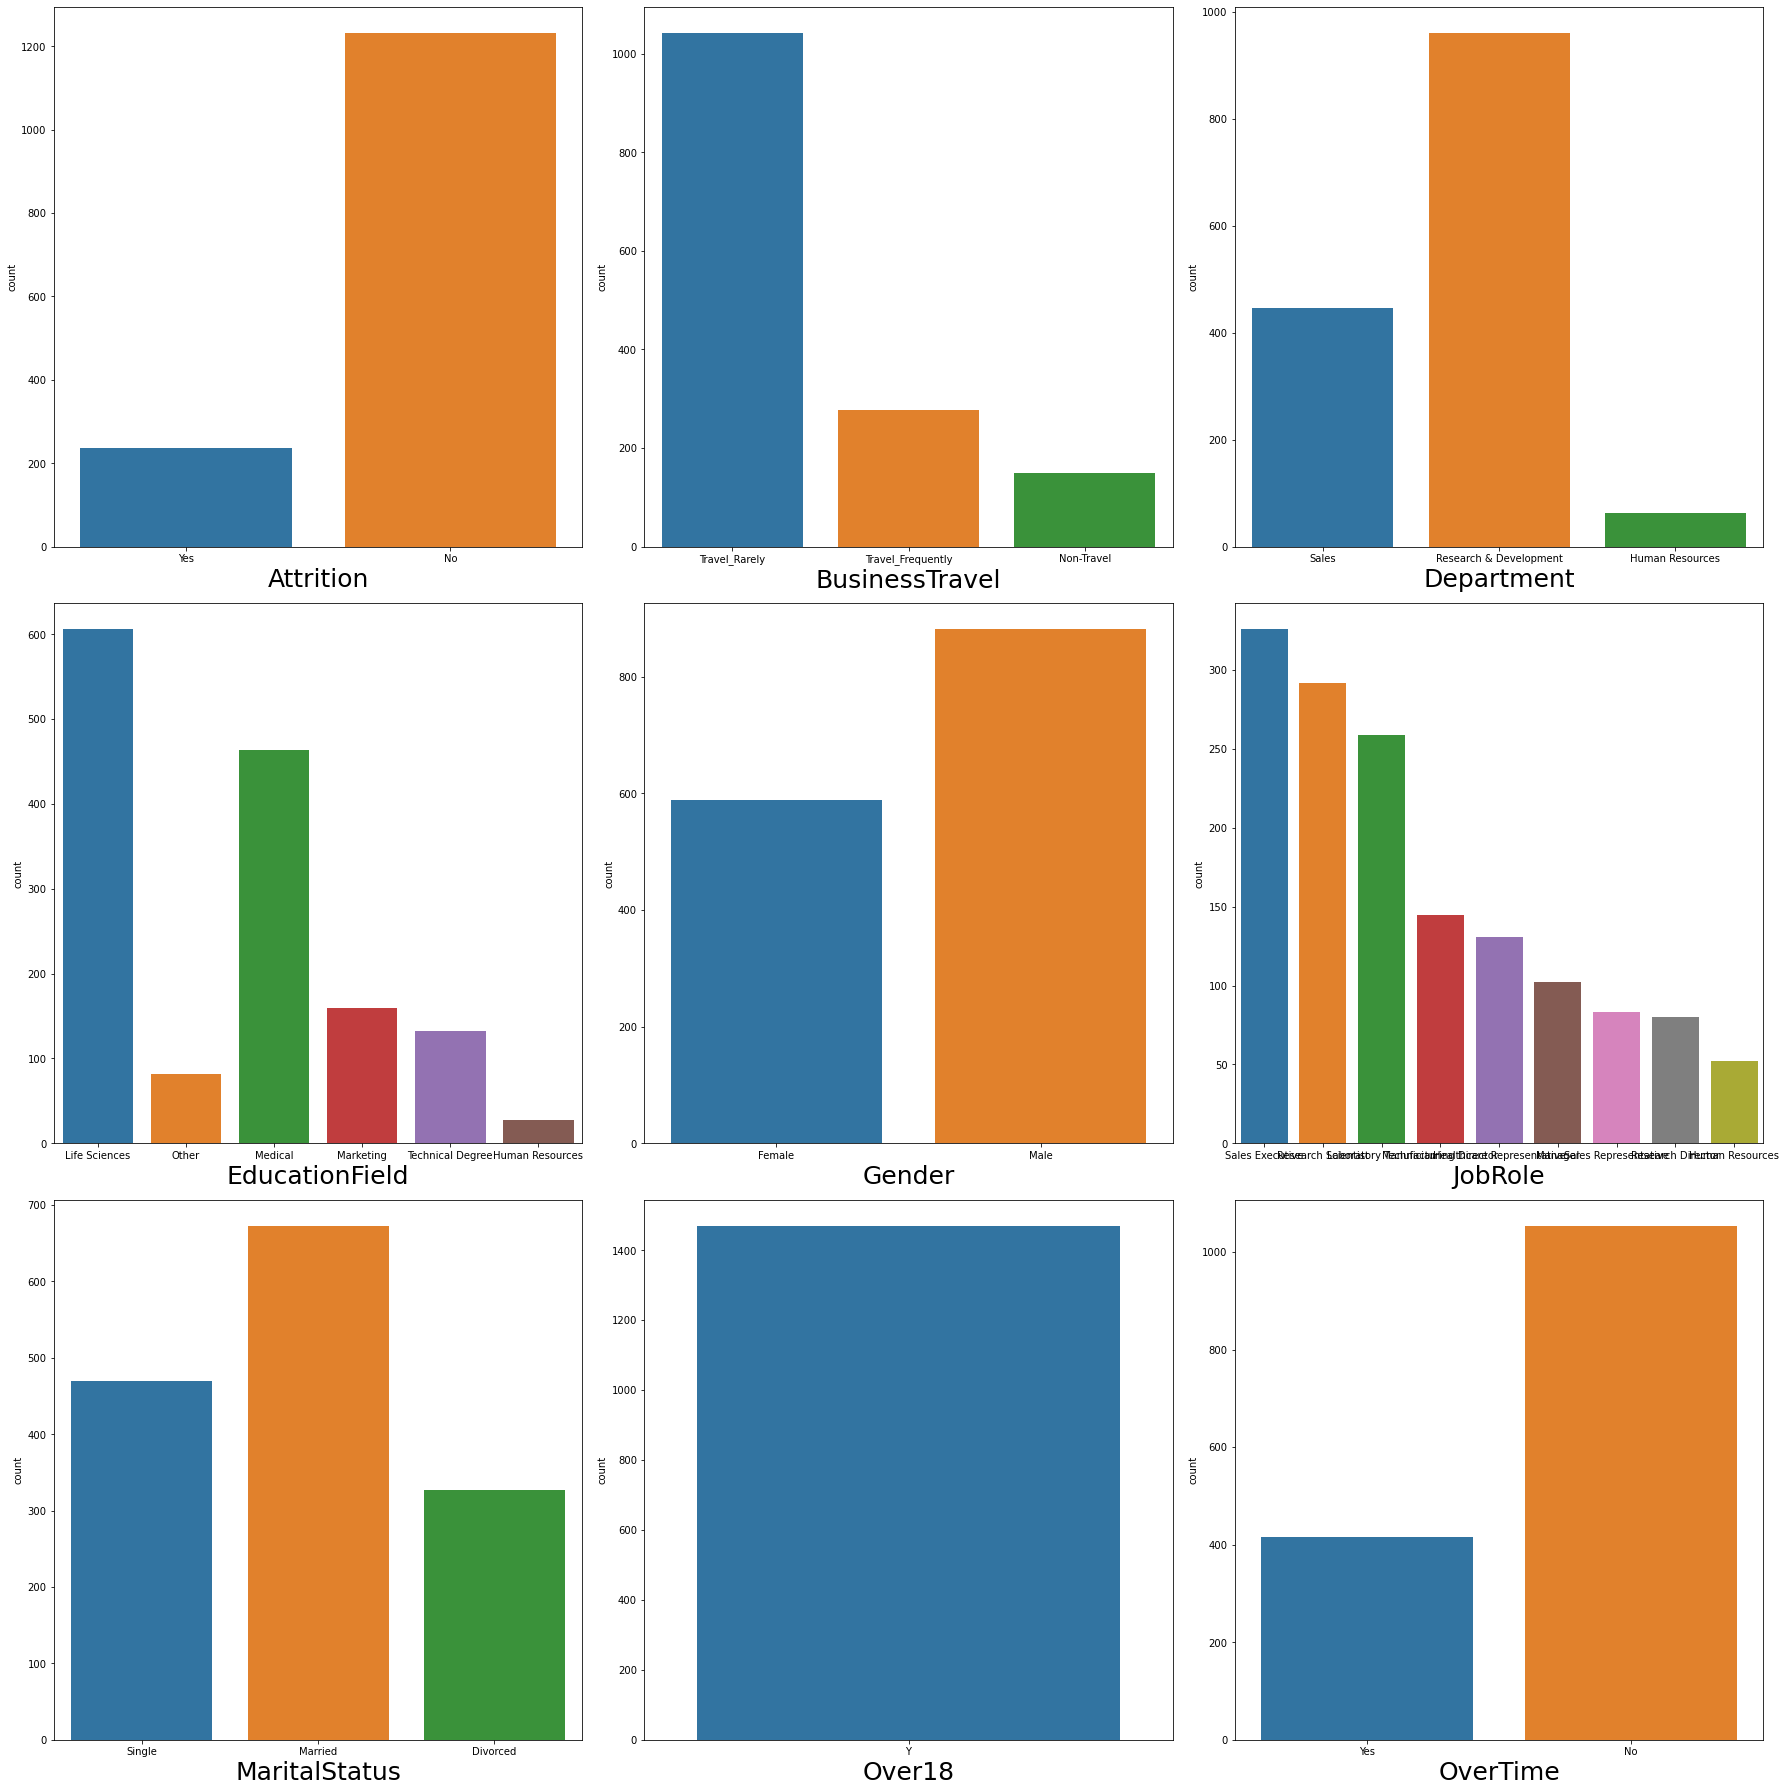

In [62]:
plt.figure(figsize=(25,25))
plotnumber=1
category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in category:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        ax=sns.countplot(df[i])
        plt.xlabel(i,fontsize=25)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

### Value count and sub categories of ordinal data

In [65]:
ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance']
for i in ordinal:
    print(i)
    print(df[i].value_counts())
    print('\n')
    

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


PerformanceRating
3    1244
4     226
Name: PerformanceRating, dtype: int64


WorkLifeBalance
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64




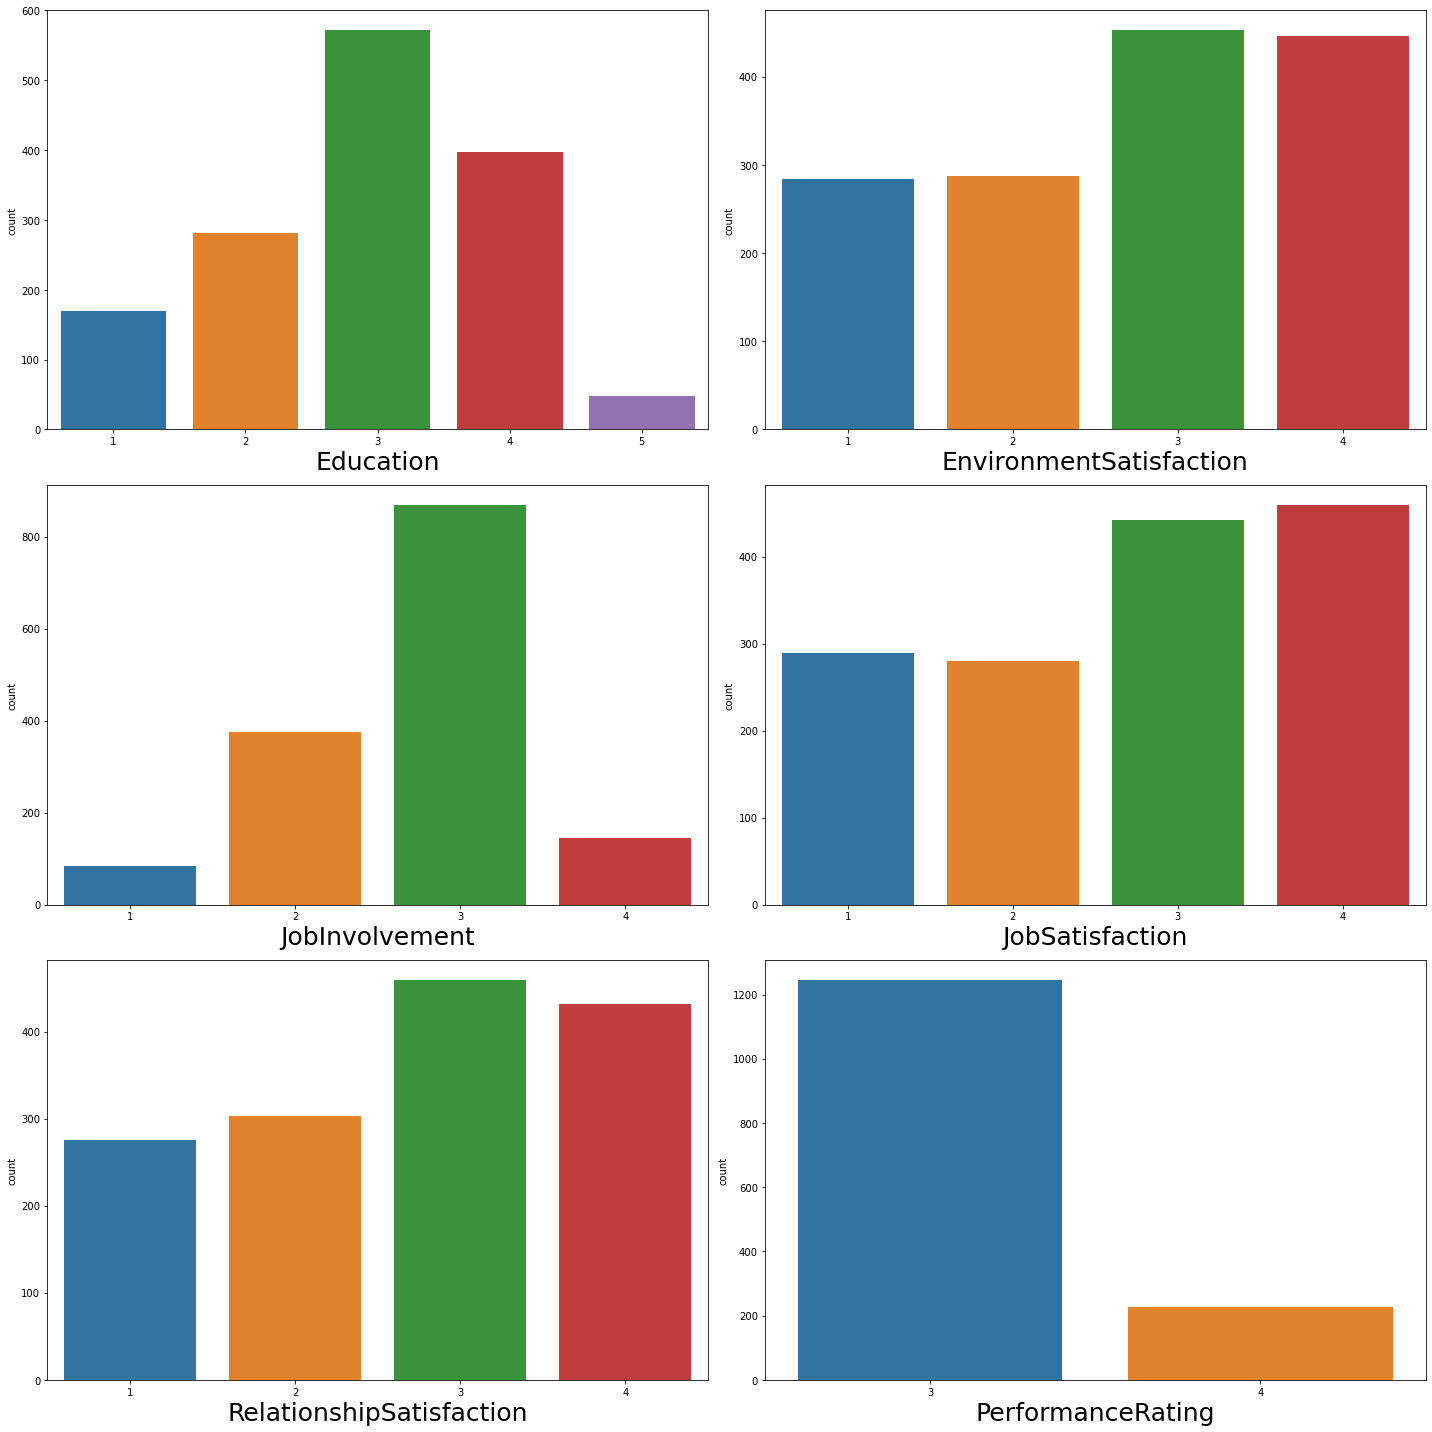

In [66]:
plt.figure(figsize=(20,20))
ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
plotnumber=1
for i in ordinal:
    if plotnumber<=6:
        plt.subplot(3,2,plotnumber)
        ax=sns.countplot(df[i])
        plt.xlabel(i,fontsize=25)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

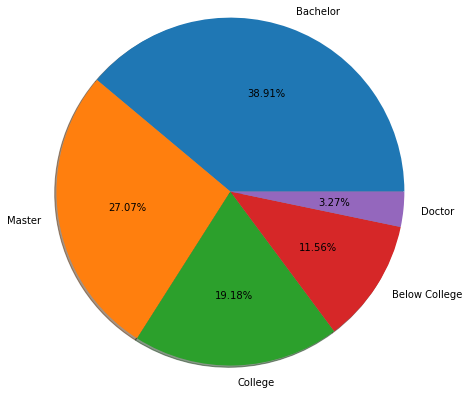

In [67]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',shadow=True,)
plt.show()

Comment:

More than 65 % employees educated at Masters or Bachelor.


30 % of Employees are highly educated which involves master and doctor degree.

Almost 19% Employees are educated upto college & 12% are below college.


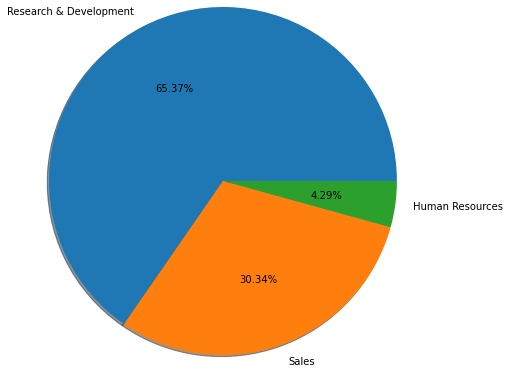

In [69]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',shadow=True)
plt.show()

comments:

From all those category mostly are from R%D

Human Resources is very less in number with 4% of the total.

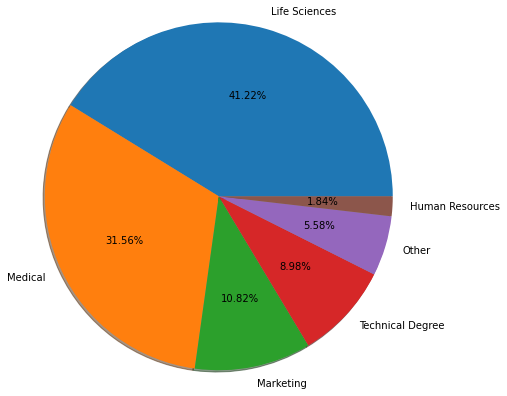

In [73]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',shadow=True)
plt.show()

In [74]:
pd.crosstab([df.Education],[df.EducationField], margins=True)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [75]:
pd.crosstab([df.Department],[df.EducationField], margins=True)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


Comments:

Most of Employees with Techanical degree are Bachelors.

Most of Employees having Masters and Doctors belong to Life Science and Medical domain.

R&D department almost everyone comes from profession or technical background except support staff. Factor like Salary Hike, travelling, overtime and Job level are things need to taken in consideration while analysing Attrition of this category.

There are 159 Employee with Marketing background and all work in Sales Department.

50% Employees in sales department have background of Life sciences & Medical. So it will interesting to see attrition rate in these employees.


<Figure size 1080x504 with 0 Axes>

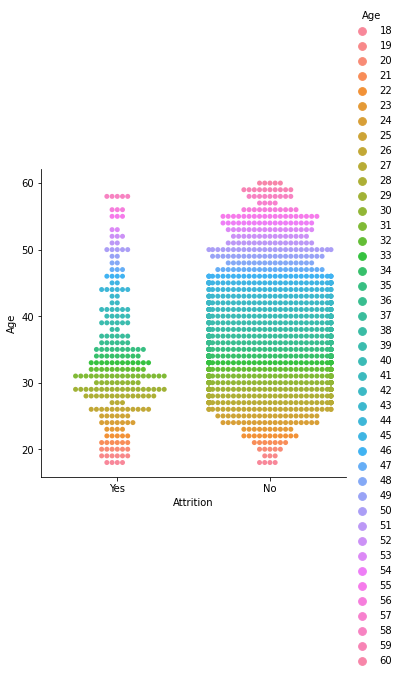

In [78]:
# lets check  variable vs target
plt.figure(figsize=(15,7))
sns.catplot('Attrition',y='Age',hue='Age',kind='swarm',data=df)

<Figure size 1080x504 with 0 Axes>

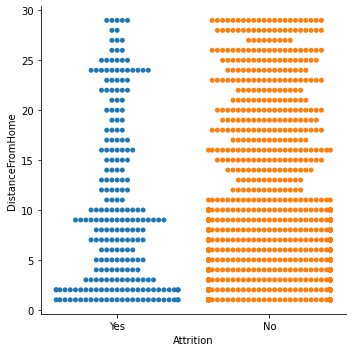

In [79]:
plt.figure(figsize=(15,7))
sns.catplot(x='Attrition',y='DistanceFromHome',kind='swarm',data=df)

<Figure size 1080x504 with 0 Axes>

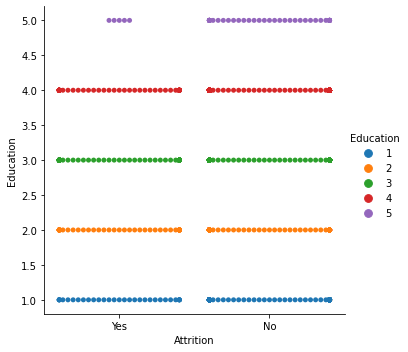

In [80]:
plt.figure(figsize=(15,7))
sns.catplot(x='Attrition',y='Education',kind='swarm',hue='Education',data=df)

<Figure size 1080x504 with 0 Axes>

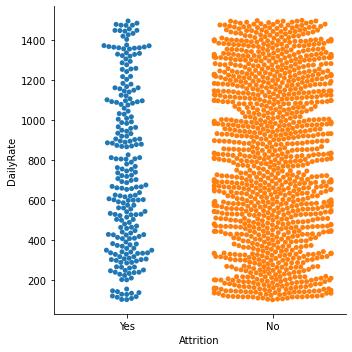

In [81]:
plt.figure(figsize=(15,7))
sns.catplot(x='Attrition',y='DailyRate',kind='swarm',data=df)

<Figure size 1080x504 with 0 Axes>

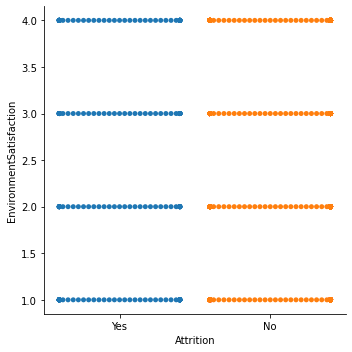

In [82]:
plt.figure(figsize=(15,7))
sns.catplot(x='Attrition',y='EnvironmentSatisfaction',kind='swarm',data=df)

<Figure size 1080x504 with 0 Axes>

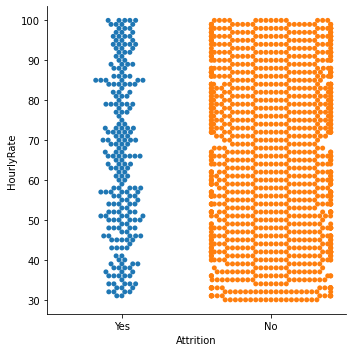

In [83]:
plt.figure(figsize=(15,7))
sns.catplot(x='Attrition',y='HourlyRate',kind='swarm',data=df)

<Figure size 1080x504 with 0 Axes>

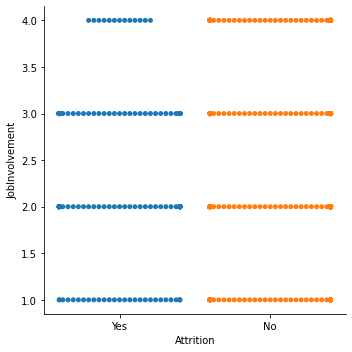

In [84]:
plt.figure(figsize=(15,7))
sns.catplot(x='Attrition',y='JobInvolvement',kind='swarm',data=df)

<Figure size 1080x504 with 0 Axes>

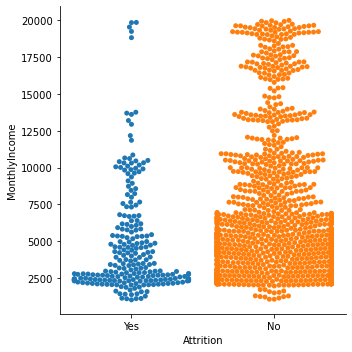

In [85]:
plt.figure(figsize=(15,7))
sns.catplot(x='Attrition',y='MonthlyIncome',kind='swarm',data=df)

<Figure size 1080x504 with 0 Axes>

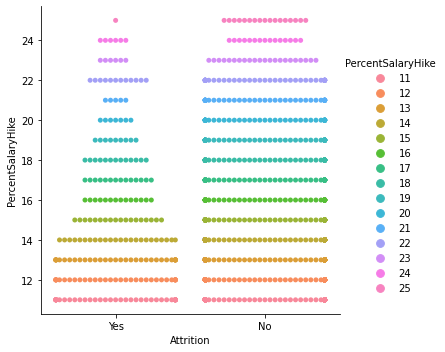

In [86]:
plt.figure(figsize=(15,7))
sns.catplot(x='Attrition',y='PercentSalaryHike',hue='PercentSalaryHike',kind='swarm',data=df)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

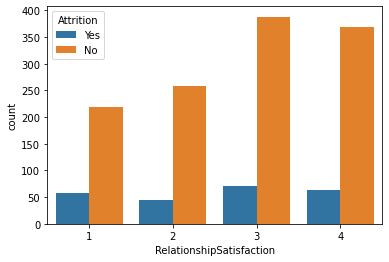

In [87]:
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=df)

<Figure size 1080x504 with 0 Axes>

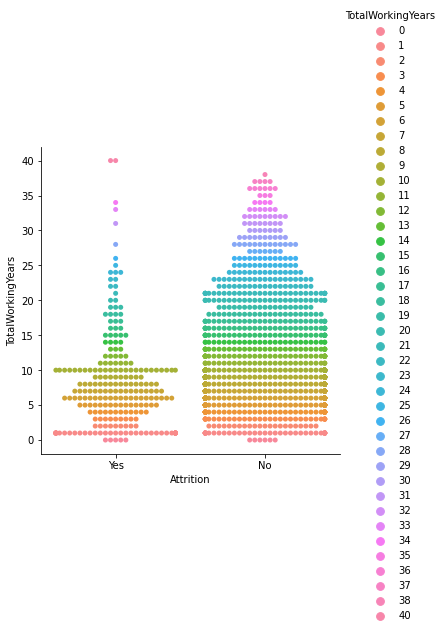

In [88]:
plt.figure(figsize=(15,7))
sns.catplot(x='Attrition',y='TotalWorkingYears',hue='TotalWorkingYears',kind='swarm',data=df)

Observation for all features:-

Age (18-32) shows high Attrition while age above 32 show significantly low Attrition of employee.

DistanceFromHome is lesser attrition rate is high.

Education with 5 value shows less attrition.

PercentSalaryHike is betwen 10 to 15 % has higher attrtion while greater salary hike has less attrition.

TotalWorkingYears between 0 to 1 has high attrition.

WorkLifeBalance does not give any insight about attrition.

YearsAtCompany between 1 to 4 has high attrition and 10 yrs and above too.

### violinplot

In [89]:
# Grouping Numeric Features
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

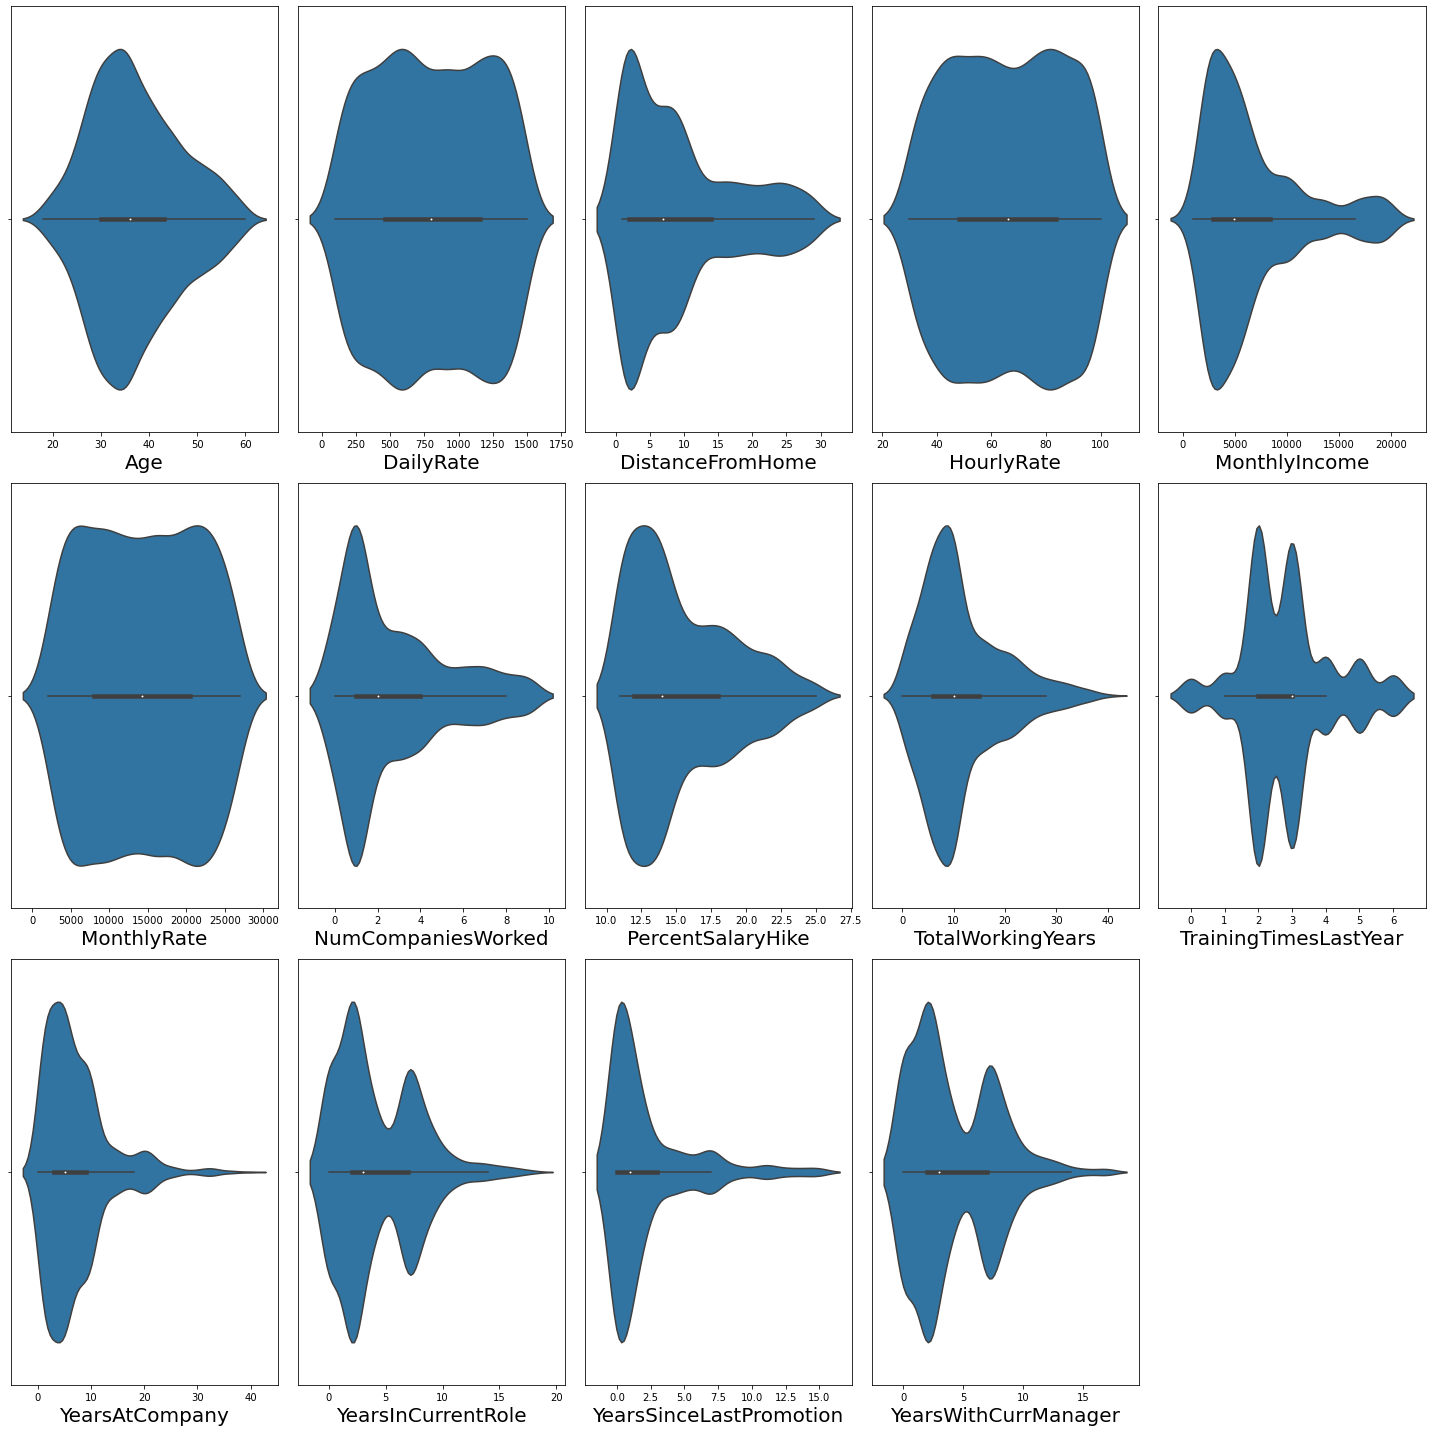

In [93]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in Numeric_int:
    if plotnumber <= 15:
        ax=plt.subplot(3,5,plotnumber)
        sns.violinplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

Comment:

For Majority of people have spend 3 to 10 years at company.
Most of people staying company upto 2 years after promotion.
Majority of people are are train 2-3 times in last year.If employees leaves job then it loss investment for company.
Majority of people stay in same role for maximum 4 yrs.
Majority of Employees have salary hike of 10 to 15%.

<AxesSubplot:xlabel='Age', ylabel='count'>

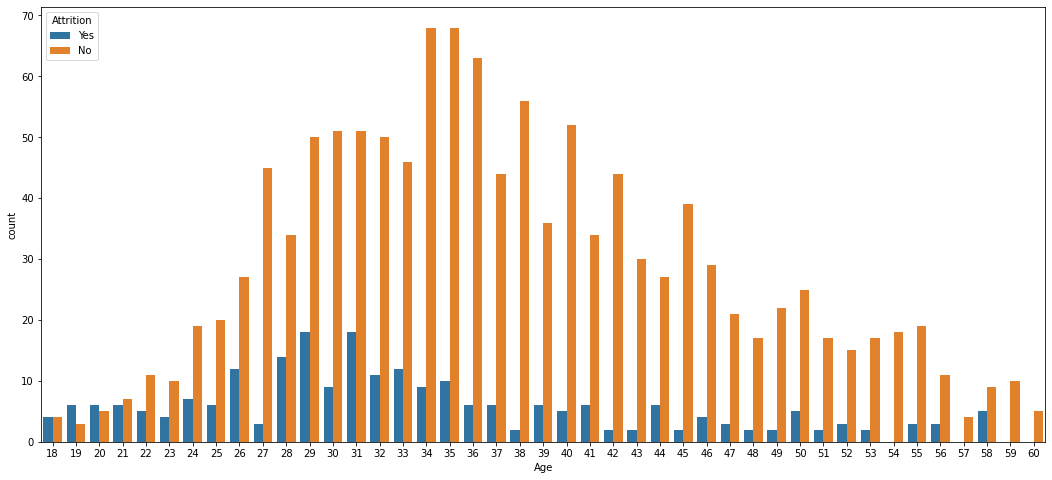

In [94]:
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df)

Comment:

The Attrition rate is minimum between the Age years of 38.

The Attrition rate is maximum between the Age years of 29 and 31.

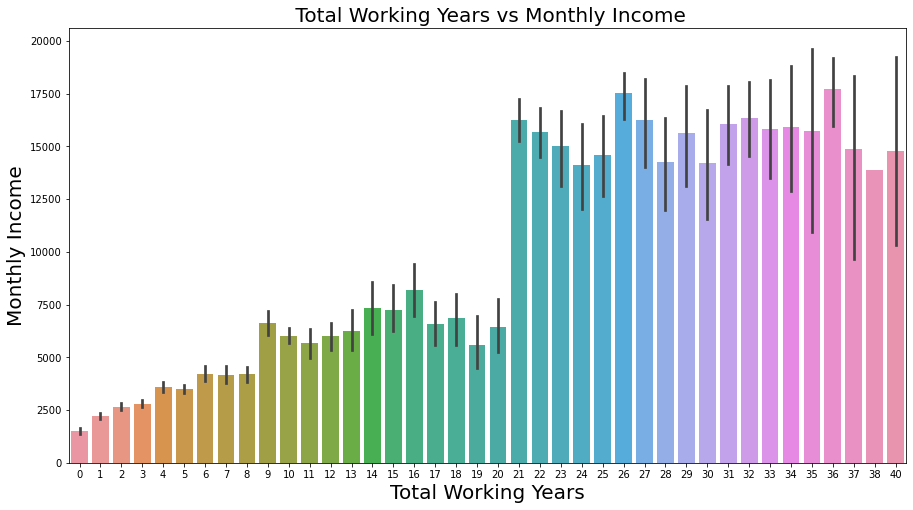

In [95]:
plt.figure(figsize=(15,8))
sns.barplot(df['TotalWorkingYears'],df['MonthlyIncome'])
plt.xlabel('Total Working Years',fontsize=20)
plt.ylabel('Monthly Income',fontsize=20)
plt.title(" Total Working Years vs Monthly Income", fontsize=20)
plt.show()

Comment:

Monthly Income is highest for the employees with 21 or more number of Total Working Years but can see little decline at the age of 37 to 40. Need to see.

# Label Encoding

In [4]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Droping unnecessary columns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)


In [6]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df=ordinal_encode(df, oe_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


#### Reason For the drop:

Emloyeecount is not much affecting target

Employee number is unique number for each employee it doesnt affect attrition

over 18: as all the employee is over 18

standard hour is equal for all

## Outlier detection and removal

In [105]:
# Grouping Numeric Features
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

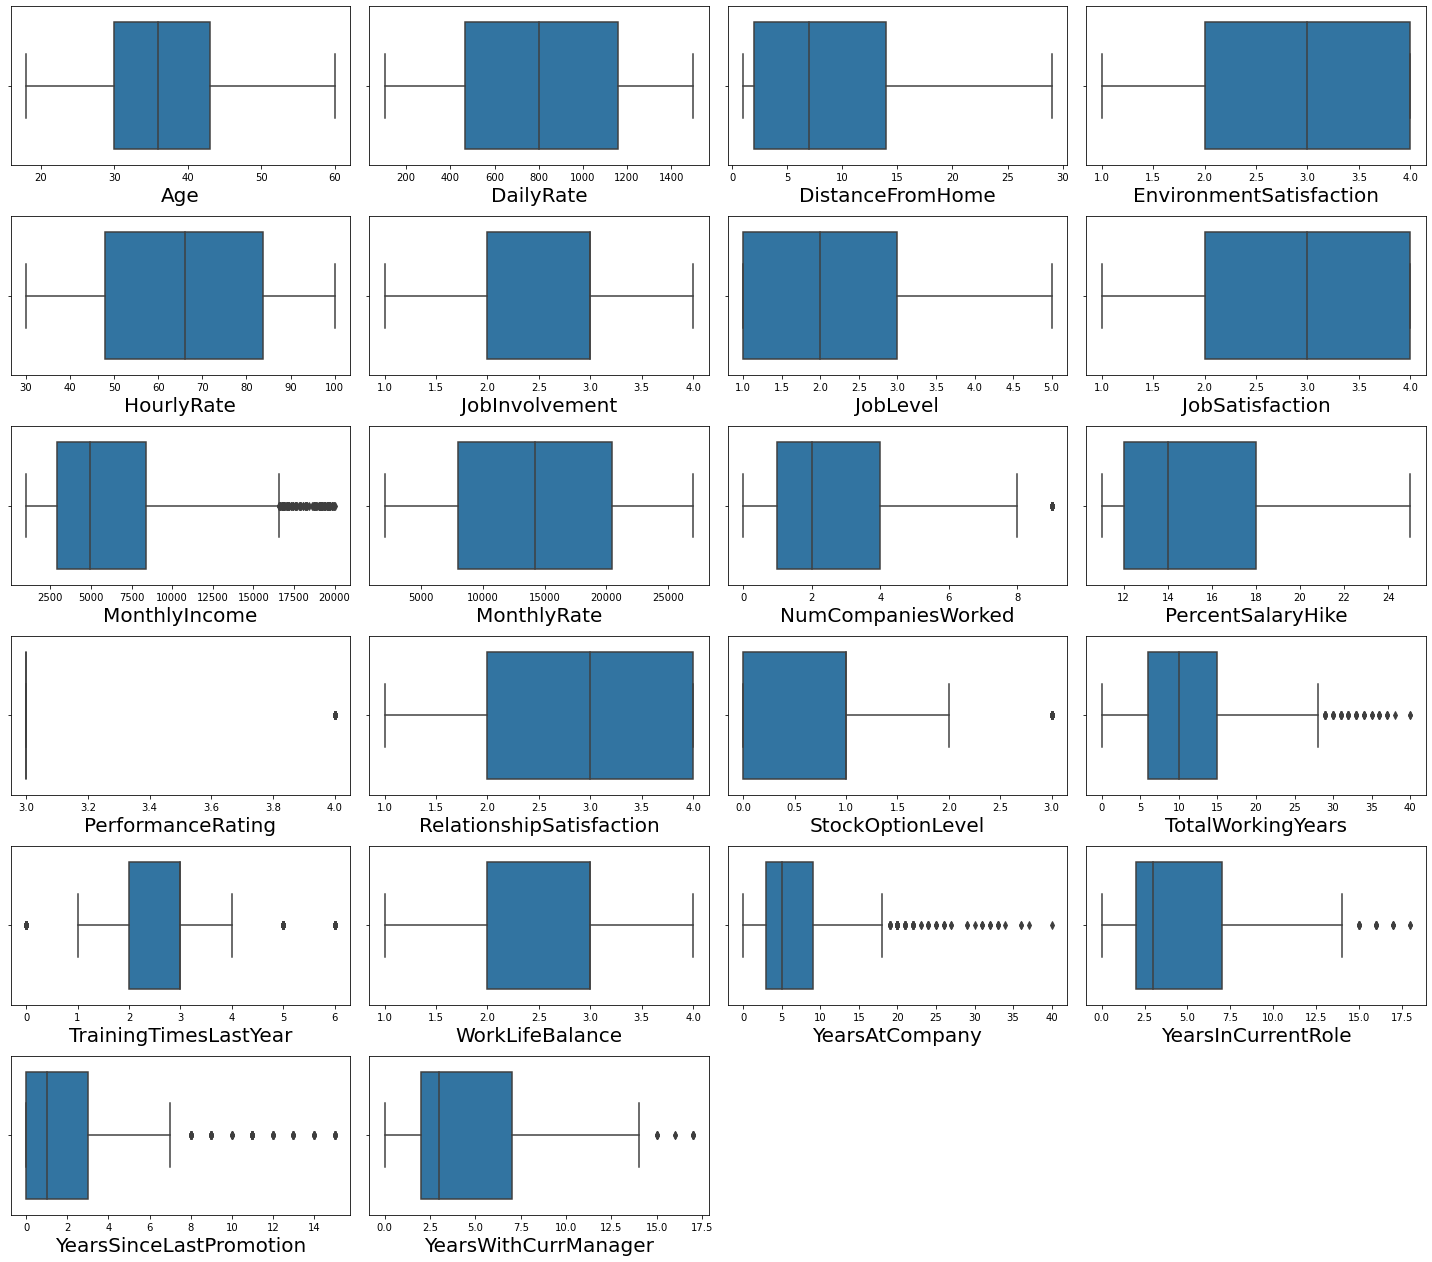

In [106]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in Numeric:
    if plotnumber <=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()
plt.show()

Features containing outliers

clearly these are showing outlier,

"MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition".

## Removing outlier

In [7]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]


In [8]:
df.shape

(1470, 31)

In [9]:
df1.shape

(1387, 31)

### Data loss

In [10]:
print('loss_percent:',(1470-1387)/1470*100,'%')

loss_percent: 5.646258503401361 %


approx 5.64% of data loss which is acceptable

In [11]:
df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

# Feature selection and Engineering

### Skewness of features


In [12]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [13]:
#Splitting data in target and dependent feature
X = df.drop(['Attrition'], axis =1)
Y = df['Attrition']

In [14]:
X.shape

(1387, 30)

In [15]:
#skewness have to be reduced
from sklearn.preprocessing import PowerTransformer

In [16]:
pt=PowerTransformer(method='yeo-johnson')

In [17]:
df=pd.DataFrame(pt.fit_transform(X),columns=X.columns)

In [18]:
df.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,0.638730,0.750615,1.379881,-1.489968,-0.902402,-0.965129,-0.712215,-1.229911,1.359498,...,-1.665335e-16,-1.524369,-1.084263,-0.173231,-2.608524,-2.14795,0.231837,0.290524,-1.073534,0.582177
1,1.371830,-1.380776,-1.343372,-0.473500,0.244561,-1.759177,-0.965129,0.204826,0.813067,-0.208763,...,9.298118e-16,1.235448,0.548653,0.147620,0.217074,0.27486,0.948319,1.006575,0.193168,1.018073
2,0.182486,0.638730,1.337080,-0.473500,-1.028366,-0.902402,1.239552,1.210036,0.813067,1.267832,...,-1.665335e-16,-0.690386,-1.084263,-0.351153,0.217074,0.27486,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,-1.380776,1.377080,-0.473500,-0.698191,1.102042,-0.965129,1.210036,-1.229911,-0.458919,...,-1.665335e-16,0.235192,-1.084263,-0.173231,0.217074,0.27486,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,0.638730,-0.467301,-0.473500,-1.028366,-1.759177,0.689982,-1.522916,0.813067,-1.290538,...,-1.665335e-16,1.235448,0.548653,-0.544046,0.217074,0.27486,-0.933983,-0.390769,0.722874,-0.347871


In [19]:
df.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

In [20]:
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.019607,0.019864,-0.036344,-0.025855,0.215520,-0.037564,0.013967,-0.037163,0.026203,...,-0.002365,0.037296,0.089449,0.652405,-0.014951,-0.016180,0.207538,0.145404,0.114162,0.142446
BusinessTravel,0.019607,1.000000,-0.001984,-0.003560,-0.007041,-0.006468,0.034658,0.004183,-0.011439,0.026364,...,-0.021061,-0.036165,-0.006092,0.027298,0.006192,-0.017977,-0.024021,-0.035610,-0.033148,-0.032665
DailyRate,0.019864,-0.001984,1.000000,-0.003546,-0.006034,-0.017504,0.040993,0.034324,-0.003271,0.015156,...,0.000687,0.005771,0.049415,0.042750,0.005118,-0.046550,0.005391,0.022143,-0.035448,0.005908
Department,-0.036344,-0.003560,-0.003546,1.000000,0.037834,0.012780,0.082525,-0.013867,-0.030950,-0.000623,...,-0.038429,-0.037572,-0.000630,-0.006833,0.039938,0.017807,0.025457,0.057817,0.017699,0.024241
DistanceFromHome,-0.025855,-0.007041,-0.006034,0.037834,1.000000,0.002714,0.021074,-0.013409,0.010557,0.015607,...,0.013212,0.009379,0.027082,-0.012129,-0.015334,-0.030011,0.006570,0.013091,-0.003873,-0.002310
Education,0.215520,-0.006468,-0.017504,0.012780,0.002714,1.000000,-0.038405,-0.026095,-0.017807,0.011105,...,-0.023157,-0.004863,0.025621,0.150720,-0.023039,0.010164,0.037921,0.051072,0.016076,0.026651
EducationField,-0.037564,0.034658,0.040993,0.082525,0.021074,-0.038405,1.000000,0.042609,0.005059,-0.004372,...,-0.001393,-0.018254,-0.012936,-0.001827,0.054321,0.034788,0.004483,0.004372,0.023062,0.028189
EnvironmentSatisfaction,0.013967,0.004183,0.034324,-0.013867,-0.013409,-0.026095,0.042609,1.000000,-0.014940,-0.042512,...,-0.024853,0.016892,0.024345,-0.013356,-0.018350,0.030422,0.012338,0.029218,0.038031,0.006417
Gender,-0.037163,-0.011439,-0.003271,-0.030950,0.010557,-0.017807,0.005059,-0.014940,1.000000,0.005618,...,-0.010757,0.041439,0.024390,-0.049776,-0.039213,0.002726,-0.046018,-0.028101,-0.016131,-0.027972
HourlyRate,0.026203,0.026364,0.015156,-0.000623,0.015607,0.011105,-0.004372,-0.042512,0.005618,1.000000,...,-0.006571,0.005207,0.041329,-0.012902,-0.018396,-0.013811,-0.032827,-0.035899,-0.062271,-0.022931


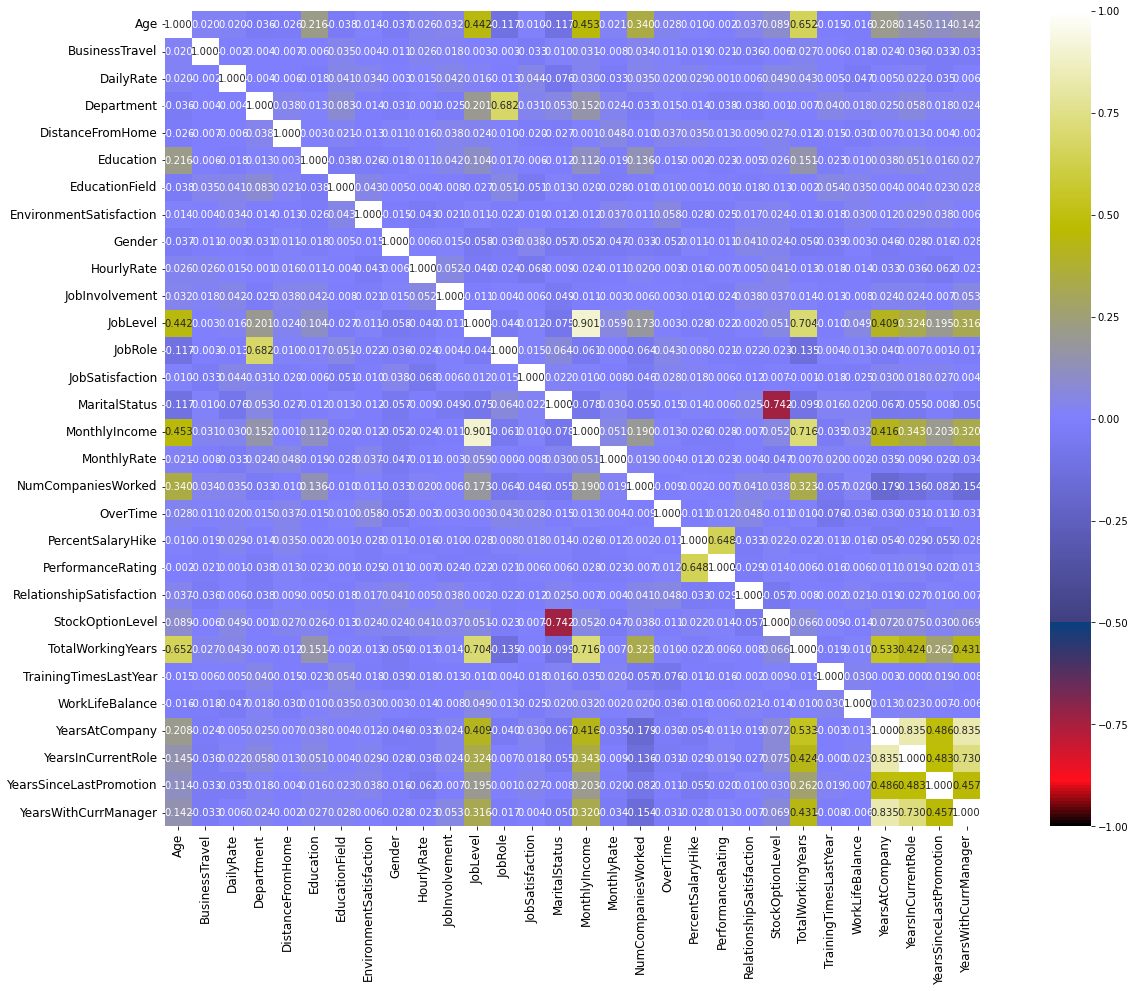

In [21]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

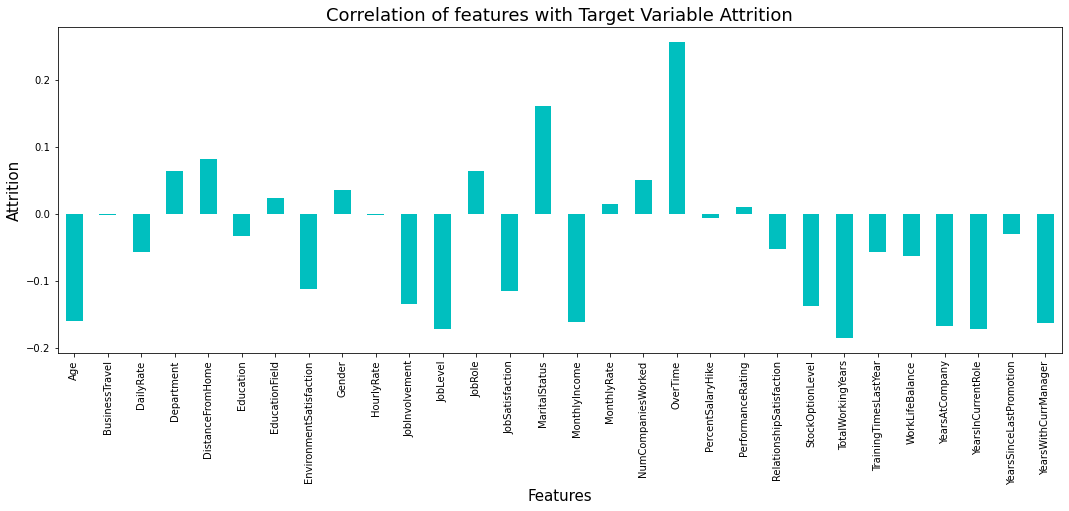

In [22]:
plt.figure(figsize = (18,6))
df1.corr()['Attrition'].drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with Target Variable Attrition',fontsize = 18)
plt.show()

Comment:

Age, JobLevel, MonthlyIncome is highly positively correlated with TotalWorkingYears.

JobLevel is highly positively correlated with the MonthlyIncome.

PercentSalaryHike is highly positively correlated with the column PerformanceRating.

### Checking Multicollinearity between features using variance_inflation_factor


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,1.930457,Age
1,1.014314,BusinessTravel
2,1.025841,DailyRate
3,2.172093,Department
4,1.017385,DistanceFromHome
5,1.065266,Education
6,1.030480,EducationField
7,1.024396,EnvironmentSatisfaction
8,1.024366,Gender
9,1.024189,HourlyRate


All the VIF value is under 10

#### As our data is imbalance we will balance it using Smote 

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

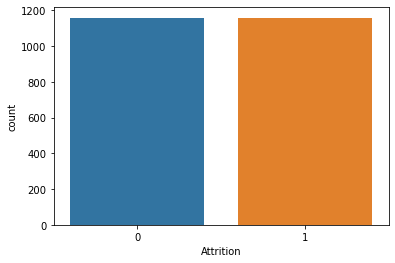

In [26]:
sns.countplot(Y)

# Standard Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

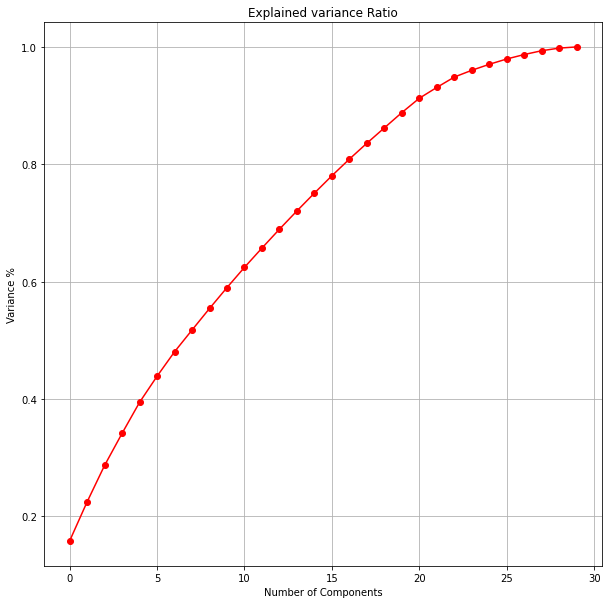

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

Comment -

AS per the graph, we can see that 24 principal components attribute for 95% of variation in the data. We shall pick the first 21 components for our prediction

In [29]:
pca_new = PCA(n_components=24)
x_new = pca_new.fit_transform(X_scale)

In [30]:
principle_x=pd.DataFrame(x_new,columns=np.arange(24))

# Machine Learning Model Building

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.28)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1667, 24)
Training target vector size: (1667,)
Test feature matrix size: (649, 24)
Test target vector size: (649,)


### Finding best Random state

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.28, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8767334360554699 on Random_state 75


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=75, test_size=.28)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Evaluation')
print('\n')
print('Accuracy Score of Logistics Regression :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :','\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression','\n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8767334360554699


Confusion matrix of Logistics Regression : 
 [[289  37]
 [ 43 280]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       326
           1       0.88      0.87      0.87       323

    accuracy                           0.88       649
   macro avg       0.88      0.88      0.88       649
weighted avg       0.88      0.88      0.88       649



### Finding value of n_neighbors for KNN

In [36]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.32369210579322216
RMSE value for k=  2 is: 0.24513761425566333
RMSE value for k=  3 is: 0.3488921493745932
RMSE value for k=  4 is: 0.2937457995634508
RMSE value for k=  5 is: 0.34667693872814326
RMSE value for k=  6 is: 0.30405578922032966
RMSE value for k=  7 is: 0.3532809023904868
RMSE value for k=  8 is: 0.32130320151461905
RMSE value for k=  9 is: 0.37854640479803287
RMSE value for k=  10 is: 0.3488921493745932
RMSE value for k=  11 is: 0.39644024648019255
RMSE value for k=  12 is: 0.3597636615081581
RMSE value for k=  13 is: 0.39056673294247163
RMSE value for k=  14 is: 0.3661316543125934
RMSE value for k=  15 is: 0.3925343359894298
RMSE value for k=  16 is: 0.3825951446165116
RMSE value for k=  17 is: 0.3925343359894298
RMSE value for k=  18 is: 0.3765057085041468
RMSE value for k=  19 is: 0.402228001483233
RMSE value for k=  20 is: 0.37445389100248766
RMSE value for k=  21 is: 0.40604067441059266
RMSE value for k=  22 is: 0.3944921253713047
RMSE value

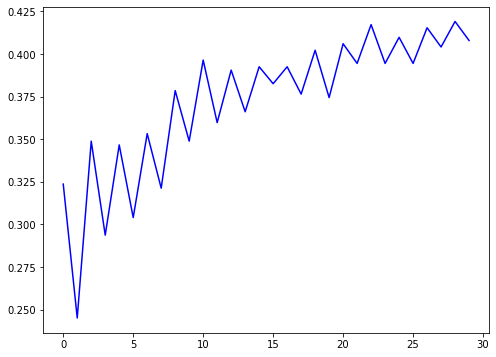

In [37]:
plt.figure(figsize = (8,6))
plt.plot(range(30), rmse_val, color='blue')

Comment-

At k= 2, we get the minimum RMSE value which approximately 0.24513761425566333 and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case



## Applying other classification algorithm

In [38]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('Classification ML Algorithm Evaluation Matrix',m,'is')
    print('\n')
    print('Accuracy Score :','\n',accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix :','\n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print(''+'Classification Report :','\n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 
 0.9322033898305084


Confusion matrix : 
 [[308  18]
 [ 26 297]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       326
           1       0.94      0.92      0.93       323

    accuracy                           0.93       649
   macro avg       0.93      0.93      0.93       649
weighted avg       0.93      0.93      0.93       649



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score : 
 0.8551617873651772


Confusion matrix : 
 [[285  41]
 [ 53 270]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       326
           1       0.87      0.84      0.85       323

    accuracy                           0.86       649
   macro avg       0.86      0.86      0.86       649
weighted avg       0.86      0.86      0.86       649


# CrossValidation :

In [40]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('Cross Validation Score', m, ':','\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() : 

Score : [0.6487069  0.69114471 0.6825054  0.66306695 0.72570194]
Mean Score : 0.6822251806062412
Std deviation : 0.0263073314071005




Cross Validation Score SVC() : 

Score : [0.58189655 0.61339093 0.60259179 0.59827214 0.59611231]
Mean Score : 0.5984527444700976
Std deviation : 0.01019704696819002




Cross Validation Score GaussianNB() : 

Score : [0.66594828 0.76025918 0.74730022 0.74298056 0.78185745]
Mean Score : 0.7396691368138824
Std deviation : 0.039262623393465444




Cross Validation Score DecisionTreeClassifier() : 

Score : [0.62931034 0.88768898 0.89848812 0.90064795 0.88768898]
Mean Score : 0.8407648767408953
Std deviation : 0.10586285286288866




Cross Validation Score KNeighborsClassifier(n_neighbors=12) : 

Score : [0.71767241 0.73218143 0.73866091 0.75161987 0.71706263]
Mean Score : 0.7314394503612125
Std deviation : 0.013085667230836777




Cross Validation Score RandomForestClassifier() : 

Score : [0.69827586 0.9

#### The minimum difference accuracy score and Cross_val_score is observed in RandomForestClassifier(), so it is our best model we move ahead with it.

## Hyper Parameter Tuning : GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100,200]}

In [43]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100, 200]},
             verbose=3)

In [44]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

# Final Model

In [45]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 100, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :','\n', accuracy_score(Y_test, y_pred))

Accuracy Score : 
 0.9198767334360555


In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

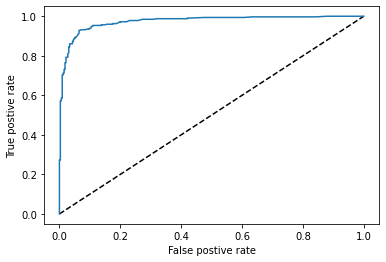

Auc Score : 
 0.9197610590894415


In [47]:
y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('Auc Score :','\n',auc_score)

# Saving model

In [48]:
import joblib
joblib.dump(Final_mod,'IBM_HR_Final.pkl')

['IBM_HR_Final.pkl']